In [255]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

from qctrlvisualizer import get_qctrl_style, plot_controls
from qctrl import Qctrl

qctrl = Qctrl()


qctrl = Qctrl(email='tomutvoicuandrei@gmail.com', password='QcH@ck2021!')

In [258]:
# first let's try to creat one good NOT gate 

In [259]:
from scipy import signal

In [ ]:
shot_count = 200

In [261]:
def gaussian_pulse(t, mean, width):
        return np.exp(-0.5 * ((t - mean) / width) ** 2.0) * np.sqrt(0.5 * np.pi / width ** 2.0)

In [320]:
def get_pulse(mean,width,segment_count):
    pulse=[]
    for i in range(0,segment_count):
        p=gaussian_pulse(t=i*segmentsize+segmentsize/2, mean=mean, width=width)
        pulse.append(p)
    return pulse 

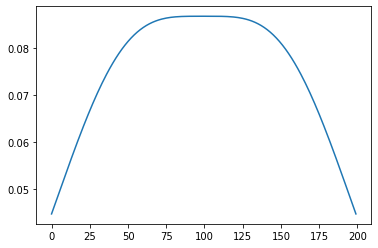

In [342]:
#initial parameters
segment_count=200
width=duration/4
mean1=duration/4
mean2=duration-mean1
segmentsize=duration/segment_count
amplitude=0.5

pulse1=get_pulse(mean1,width,segment_count)
pulse2=get_pulse(mean2,width,segment_count)
pulse=[pulse2[i]+pulse1[i] for i in range (len(pulse1))]
plt.plot(pulse)

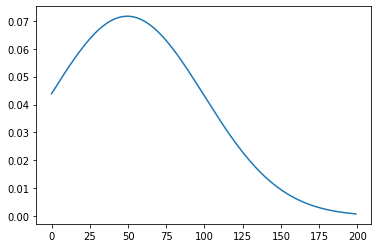

In [343]:
plt.plot(pulse1)

In [349]:
control = []
real_part = pulse#np.random.random(size=[segment_count])
imag_part = np.random.random(size=[segment_count])
values = amplitude * (pulse1 + 1j * imag_part*0)+(amplitude+0.5) * (pulse2 + 1j * imag_part*0)
control.append({"duration": duration, "values": values})

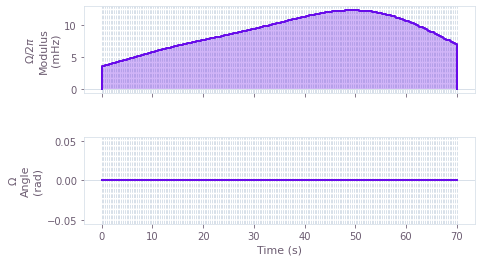

In [350]:
# Plot the last control as an example.
plot_controls(
    figure=plt.figure(),
    controls={
        "$\Omega$": [
            {"duration": duration / segment_count, "value": value} for value in values
        ]
    },
)

In [266]:
a=np.linspace(0.5,5,num=100, endpoint=True)
values = amplitude * (real_part + 1j * imag_part*0)

In [ ]:
p_1

In [457]:
def cost_x(params):
    
    print('\n params:',params)
    amplitude1=params[0]
    amplitude2=params[1]
    width1=params[2]
    width2=params[3]  
    
    #
    mean1=duration/4
    mean2=duration-duration/4
    #
    
    segmentsize=duration/segment_count
    
    
    pulse1=get_pulse(mean1,width1,segment_count)
    pulse2=get_pulse(mean2,width2,segment_count)
    pulse_real=[pulse2[i]+pulse1[i] for i in range (len(pulse1))]
    #pulse_real=get_pulse(mean,width,segment_count)
    
    real_part = pulse_real
    imag_part = np.random.random(size=[segment_count])# if first experiments it will be set to 0
    
    values = np.array([amplitude1 * (pulse1[i] + 1j * imag_part[i]*0)+amplitude2 * (pulse2[i] + 1j * imag_part[i]*0)for i in range (len(pulse1))])
    
    repetitions=[1,2,3,4,5,6,7,8]
    controls=[]
    for repetition_count in repetitions:
        controls.append({"duration": duration, "values": values, "repetition_count": repetition_count})
        #print(len(controls[0]['values']))
        experiment_results = qctrl.functions.calculate_qchack_measurements(controls=controls,shot_count=shot_count,)


    cost=0
    for repetition_count, measurement_counts in zip(repetitions, experiment_results.measurements):
        p0 = measurement_counts.count(0) / shot_count
        p1 = measurement_counts.count(1) / shot_count
        p2 = measurement_counts.count(2) / shot_count
        y_genrate=[p0,p1,p2]
        if  repetition_count%2!=0:
            y_desire=[0,1,0]
            c=np.array(y_desire) @ np.array(y_genrate)
            cost=cost-c
        else:
            y_desire=[1,0,0]
            c=np.array(y_desire) @ np.array(y_genrate)
            cost=cost-c

        print(f"With {repetition_count:2d} repetitions: P(|0>) = {p0:.2f}, P(|1>) = {p1:.2f}, P(|2>) = {p2:.2f} ,c={c:.3f} .")
    
    print('Cost:',cost)
    return cost 

In [458]:
segment_count=250 #200
width=26
mean=duration/4
segmentsize=duration/segment_count
amplitude=16
duration = 201

init_params=[amplitude,-amplitude,width,width]
init_params=[ 15.4352422 , -15.42328656 , 25.70388755 , 26.82907574]#[ 15.40751578, -15.46484757 , 25.82832774 , 26.82726897]#[ 16.00178367, -14.99995812  ,26.00029483 , 26.99926206]

In [459]:
cost_x(init_params)


 params: [15.4352422, -15.42328656, 25.70388755, 26.82907574]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  2 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  3 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  4 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  5 repetitions: P(|0>) = 0.10, P(|1>) = 0.90, P(|2>) = 0.00 ,c=0.900 .
With  6 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  7 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  8 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
Cost: -7.75


-7.75

In [460]:
params=init_params#[ 6.5388117 , 13.36186856]
cobyla_options = {'maxiter': 1000, 'disp': True, 'catol': 0.002}
res = scipy.optimize.minimize(cost_x, params, method='COBYLA',options=cobyla_options)


 params: [ 15.4352422  -15.42328656  25.70388755  26.82907574]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.02, P(|1>) = 0.98, P(|2>) = 0.00 ,c=0.980 .
With  2 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  3 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  4 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  5 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  6 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  7 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  8 repetitions: P(|0>) = 0.93, P(|1>) = 0.07, P(|2>) = 0.00 ,c=0.930 .
Cost: -7.759999999999999

 params: [ 16.4352422  -15.42328656  25.70388755  26.82907574]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.15, P(|1>) = 0.85, P(|2>) = 0.00 ,c=0.850 .
With  2 repetitions: P(|0>) = 0.90, P(|1>) = 0.10, P(|2>) = 0.00 ,c=0.900 .
With  3 repetitions: P(|0>) = 0.35, P(|1>) = 0.65, P(|2>) = 0.00 ,c=0.650 .
With  4 repetitions: P(|0>) = 0.74, P(|1>) = 0.26, P(|2>) = 0.00 ,c=0.740 .
With  5 repetitions: P(|0>) = 0.50, P(|1>) = 0.50, P(|2>) = 0.00 ,c=0.500 .
With  6 repetitions: P(|0>) = 0.43, P(|1>) = 0.57, P(|2>) = 0.00 ,c=0.430 .
With  7 repetitions: P(|0>) = 0.83, P(|1>) = 0.17, P(|2>) = 0.00 ,c=0.170 .
With  8 repetitions: P(|0>) = 0.30, P(|1>) = 0.70, P(|2>) = 0.00 ,c=0.300 .
Cost: -4.539999999999999

 params: [ 15.4352422  -14.42328656  25.70388755  26.82907574]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 17s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.10, P(|1>) = 0.90, P(|2>) = 0.00 ,c=0.900 .
With  2 repetitions: P(|0>) = 0.84, P(|1>) = 0.16, P(|2>) = 0.00 ,c=0.840 .
With  3 repetitions: P(|0>) = 0.42, P(|1>) = 0.58, P(|2>) = 0.00 ,c=0.580 .
With  4 repetitions: P(|0>) = 0.51, P(|1>) = 0.49, P(|2>) = 0.00 ,c=0.510 .
With  5 repetitions: P(|0>) = 0.68, P(|1>) = 0.32, P(|2>) = 0.00 ,c=0.320 .
With  6 repetitions: P(|0>) = 0.16, P(|1>) = 0.84, P(|2>) = 0.00 ,c=0.160 .
With  7 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=0.000 .
With  8 repetitions: P(|0>) = 0.06, P(|1>) = 0.94, P(|2>) = 0.00 ,c=0.060 .
Cost: -3.37

 params: [ 15.4352422  -15.42328656  26.70388755  26.82907574]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 17s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.02, P(|1>) = 0.98, P(|2>) = 0.00 ,c=0.980 .
With  2 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  3 repetitions: P(|0>) = 0.08, P(|1>) = 0.92, P(|2>) = 0.00 ,c=0.920 .
With  4 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  5 repetitions: P(|0>) = 0.11, P(|1>) = 0.89, P(|2>) = 0.00 ,c=0.890 .
With  6 repetitions: P(|0>) = 0.90, P(|1>) = 0.10, P(|2>) = 0.00 ,c=0.900 .
With  7 repetitions: P(|0>) = 0.16, P(|1>) = 0.84, P(|2>) = 0.00 ,c=0.840 .
With  8 repetitions: P(|0>) = 0.84, P(|1>) = 0.16, P(|2>) = 0.00 ,c=0.840 .
Cost: -7.33

 params: [ 15.4352422  -15.42328656  25.70388755  27.82907574]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 16s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  2 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  3 repetitions: P(|0>) = 0.02, P(|1>) = 0.98, P(|2>) = 0.00 ,c=0.980 .
With  4 repetitions: P(|0>) = 0.94, P(|1>) = 0.06, P(|2>) = 0.00 ,c=0.940 .
With  5 repetitions: P(|0>) = 0.08, P(|1>) = 0.92, P(|2>) = 0.00 ,c=0.920 .
With  6 repetitions: P(|0>) = 0.88, P(|1>) = 0.12, P(|2>) = 0.00 ,c=0.880 .
With  7 repetitions: P(|0>) = 0.12, P(|1>) = 0.88, P(|2>) = 0.00 ,c=0.880 .
With  8 repetitions: P(|0>) = 0.80, P(|1>) = 0.20, P(|2>) = 0.00 ,c=0.800 .
Cost: -7.35

 params: [ 14.84728962 -16.22487408  25.62537214  26.75421221]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 23s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 10s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  2 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  3 repetitions: P(|0>) = 0.11, P(|1>) = 0.89, P(|2>) = 0.00 ,c=0.890 .
With  4 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.970 .
With  5 repetitions: P(|0>) = 0.07, P(|1>) = 0.93, P(|2>) = 0.00 ,c=0.930 .
With  6 repetitions: P(|0>) = 0.93, P(|1>) = 0.07, P(|2>) = 0.00 ,c=0.930 .
With  7 repetitions: P(|0>) = 0.17, P(|1>) = 0.83, P(|2>) = 0.00 ,c=0.830 .
With  8 repetitions: P(|0>) = 0.85, P(|1>) = 0.15, P(|2>) = 0.00 ,c=0.850 .
Cost: -7.339999999999999

 params: [ 15.14126591 -15.82408032  25.66462985  26.79164398]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 10s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 14s.
With  1 repetitions: P(|0>) = 0.09, P(|1>) = 0.91, P(|2>) = 0.00 ,c=0.910 .
With  2 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  3 repetitions: P(|0>) = 0.02, P(|1>) = 0.98, P(|2>) = 0.00 ,c=0.980 .
With  4 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  5 repetitions: P(|0>) = 0.06, P(|1>) = 0.94, P(|2>) = 0.00 ,c=0.940 .
With  6 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  7 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  8 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.960 .
Cost: -7.720000000000001

 params: [ 15.63899309 -15.56684179  25.68982633  26.81566853]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 10s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  2 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.960 .
With  3 repetitions: P(|0>) = 0.08, P(|1>) = 0.92, P(|2>) = 0.00 ,c=0.920 .
With  4 repetitions: P(|0>) = 0.92, P(|1>) = 0.08, P(|2>) = 0.00 ,c=0.920 .
With  5 repetitions: P(|0>) = 0.09, P(|1>) = 0.91, P(|2>) = 0.00 ,c=0.910 .
With  6 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.970 .
With  7 repetitions: P(|0>) = 0.14, P(|1>) = 0.86, P(|2>) = 0.00 ,c=0.860 .
With  8 repetitions: P(|0>) = 0.85, P(|1>) = 0.15, P(|2>) = 0.00 ,c=0.850 .
Cost: -7.34

 params: [ 15.4352422  -15.41110114  25.57948291  26.82907574]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 23s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.07, P(|1>) = 0.93, P(|2>) = 0.00 ,c=0.930 .
With  2 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  3 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  4 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  5 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  6 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  7 repetitions: P(|0>) = 0.07, P(|1>) = 0.93, P(|2>) = 0.00 ,c=0.930 .
With  8 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
Cost: -7.710000000000001

 params: [ 15.25325554 -15.27751327  25.77388727  26.77223349]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 16s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 97s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 13s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.00, P(|1>) = 1.00, P(|2>) = 0.00 ,c=1.000 .
With  2 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.960 .
With  3 repetitions: P(|0>) = 0.08, P(|1>) = 0.92, P(|2>) = 0.00 ,c=0.920 .
With  4 repetitions: P(|0>) = 0.88, P(|1>) = 0.12, P(|2>) = 0.00 ,c=0.880 .
With  5 repetitions: P(|0>) = 0.17, P(|1>) = 0.83, P(|2>) = 0.00 ,c=0.830 .
With  6 repetitions: P(|0>) = 0.78, P(|1>) = 0.22, P(|2>) = 0.00 ,c=0.780 .
With  7 repetitions: P(|0>) = 0.24, P(|1>) = 0.76, P(|2>) = 0.00 ,c=0.760 .
With  8 repetitions: P(|0>) = 0.56, P(|1>) = 0.44, P(|2>) = 0.00 ,c=0.560 .
Cost: -6.6899999999999995

 params: [ 15.41967849 -15.43432621  25.70757156  27.07831925]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 13s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  2 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  3 repetitions: P(|0>) = 0.02, P(|1>) = 0.98, P(|2>) = 0.00 ,c=0.980 .
With  4 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  5 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  6 repetitions: P(|0>) = 0.93, P(|1>) = 0.07, P(|2>) = 0.00 ,c=0.930 .
With  7 repetitions: P(|0>) = 0.08, P(|1>) = 0.92, P(|2>) = 0.00 ,c=0.920 .
With  8 repetitions: P(|0>) = 0.95, P(|1>) = 0.05, P(|2>) = 0.00 ,c=0.950 .
Cost: -7.68

 params: [ 15.34361343 -15.35018788  25.73910274  26.80366627]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.03, P(|1>) = 0.96, P(|2>) = 0.01 ,c=0.960 .
With  2 repetitions: P(|0>) = 0.95, P(|1>) = 0.05, P(|2>) = 0.00 ,c=0.950 .
With  3 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  4 repetitions: P(|0>) = 0.94, P(|1>) = 0.06, P(|2>) = 0.00 ,c=0.940 .
With  5 repetitions: P(|0>) = 0.07, P(|1>) = 0.93, P(|2>) = 0.00 ,c=0.930 .
With  6 repetitions: P(|0>) = 0.94, P(|1>) = 0.06, P(|2>) = 0.00 ,c=0.940 .
With  7 repetitions: P(|0>) = 0.12, P(|1>) = 0.88, P(|2>) = 0.00 ,c=0.880 .
With  8 repetitions: P(|0>) = 0.82, P(|1>) = 0.18, P(|2>) = 0.00 ,c=0.820 .
Cost: -7.38

 params: [ 15.47435107 -15.37497511  25.70861965  26.83358774]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 61s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.
With  1 repetitions: P(|0>) = 0.02, P(|1>) = 0.98, P(|2>) = 0.00 ,c=0.980 .
With  2 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.970 .
With  3 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  4 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  5 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  6 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  7 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  8 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.960 .
Cost: -7.77

 params: [ 15.5747495  -15.44849582  25.71630459  26.8245987 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 16s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 10s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 5s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 10s.
With  1 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  2 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  3 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  4 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.970 .
With  5 repetitions: P(|0>) = 0.06, P(|1>) = 0.94, P(|2>) = 0.00 ,c=0.940 .
With  6 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  7 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  8 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
Cost: -7.76

 params: [ 15.47520243 -15.38053591  25.71020083  26.89581396]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 17s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  2 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  3 repetitions: P(|0>) = 0.01, P(|1>) = 0.99, P(|2>) = 0.00 ,c=0.990 .
With  4 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  5 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  6 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  7 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  8 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
Cost: -7.819999999999999

 params: [ 15.47229685 -15.38115459  25.74129887  26.89500822]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 10s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 10s.
With  1 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  2 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  3 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  4 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.960 .
With  5 repetitions: P(|0>) = 0.07, P(|1>) = 0.93, P(|2>) = 0.00 ,c=0.930 .
With  6 repetitions: P(|0>) = 0.93, P(|1>) = 0.07, P(|2>) = 0.00 ,c=0.930 .
With  7 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  8 repetitions: P(|0>) = 0.93, P(|1>) = 0.07, P(|2>) = 0.00 ,c=0.930 .
Cost: -7.629999999999999

 params: [ 15.48137845 -15.3783363   25.6488323   26.90567155]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.01, P(|1>) = 0.99, P(|2>) = 0.00 ,c=0.990 .
With  2 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  3 repetitions: P(|0>) = 0.01, P(|1>) = 0.99, P(|2>) = 0.00 ,c=0.990 .
With  4 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  5 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  6 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.960 .
With  7 repetitions: P(|0>) = 0.07, P(|1>) = 0.93, P(|2>) = 0.00 ,c=0.930 .
With  8 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
Cost: -7.81

 params: [ 15.45096393 -15.36097503  25.70880239  26.89792917]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  2 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.960 .
With  3 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  4 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.960 .
With  5 repetitions: P(|0>) = 0.02, P(|1>) = 0.98, P(|2>) = 0.00 ,c=0.980 .
With  6 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  7 repetitions: P(|0>) = 0.09, P(|1>) = 0.91, P(|2>) = 0.00 ,c=0.910 .
With  8 repetitions: P(|0>) = 0.92, P(|1>) = 0.08, P(|2>) = 0.00 ,c=0.920 .
Cost: -7.630000000000001

 params: [ 15.5240381  -15.41890071  25.71603106  26.89974814]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.06, P(|1>) = 0.94, P(|2>) = 0.00 ,c=0.940 .
With  2 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  3 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  4 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.970 .
With  5 repetitions: P(|0>) = 0.12, P(|1>) = 0.88, P(|2>) = 0.00 ,c=0.880 .
With  6 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  7 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  8 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
Cost: -7.71

 params: [ 15.45434182 -15.36215884  25.71343744  26.90971379]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 26s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.00, P(|1>) = 1.00, P(|2>) = 0.00 ,c=1.000 .
With  2 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  3 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  4 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.970 .
With  5 repetitions: P(|0>) = 0.06, P(|1>) = 0.94, P(|2>) = 0.00 ,c=0.940 .
With  6 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.960 .
With  7 repetitions: P(|0>) = 0.13, P(|1>) = 0.87, P(|2>) = 0.00 ,c=0.870 .
With  8 repetitions: P(|0>) = 0.92, P(|1>) = 0.08, P(|2>) = 0.00 ,c=0.920 .
Cost: -7.629999999999999

 params: [ 15.484773   -15.36838828  25.71128619  26.89386408]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.02, P(|1>) = 0.98, P(|2>) = 0.00 ,c=0.980 .
With  2 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  3 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  4 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  5 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  6 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  7 repetitions: P(|0>) = 0.07, P(|1>) = 0.93, P(|2>) = 0.00 ,c=0.930 .
With  8 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.970 .
Cost: -7.769999999999999

 params: [ 15.46789526 -15.38760832  25.70488495  26.86674697]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 17s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 29s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  2 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  3 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  4 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  5 repetitions: P(|0>) = 0.02, P(|1>) = 0.98, P(|2>) = 0.00 ,c=0.980 .
With  6 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.970 .
With  7 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  8 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.960 .
Cost: -7.77

 params: [ 15.48294522 -15.39343532  25.711455    26.89984162]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 36s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  2 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  3 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  4 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  5 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  6 repetitions: P(|0>) = 0.97, P(|1>) = 0.03, P(|2>) = 0.00 ,c=0.970 .
With  7 repetitions: P(|0>) = 0.06, P(|1>) = 0.94, P(|2>) = 0.00 ,c=0.940 .
With  8 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
Cost: -7.75

 params: [ 15.47429534 -15.38068959  25.71787505  26.8946759 ]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 7s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 16s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  2 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  3 repetitions: P(|0>) = 0.02, P(|1>) = 0.98, P(|2>) = 0.00 ,c=0.980 .
With  4 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.960 .
With  5 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  6 repetitions: P(|0>) = 0.96, P(|1>) = 0.04, P(|2>) = 0.00 ,c=0.960 .
With  7 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  8 repetitions: P(|0>) = 0.94, P(|1>) = 0.06, P(|2>) = 0.00 ,c=0.940 .
Cost: -7.74

 params: [ 15.46804205 -15.37783199  25.69773137  26.90129765]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  2 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  3 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  4 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  5 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  6 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  7 repetitions: P(|0>) = 0.08, P(|1>) = 0.92, P(|2>) = 0.00 ,c=0.920 .
With  8 repetitions: P(|0>) = 0.94, P(|1>) = 0.06, P(|2>) = 0.00 ,c=0.940 .
Cost: -7.709999999999999

 params: [ 15.47540597 -15.38218443  25.7077285   26.88859152]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has started.
Your task calculate_qchack_measurements has completed in 16s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.03, P(|1>) = 0.97, P(|2>) = 0.00 ,c=0.970 .
With  2 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  3 repetitions: P(|0>) = 0.01, P(|1>) = 0.99, P(|2>) = 0.00 ,c=0.990 .
With  4 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  5 repetitions: P(|0>) = 0.02, P(|1>) = 0.98, P(|2>) = 0.00 ,c=0.980 .
With  6 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  7 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  8 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
Cost: -7.85

 params: [ 15.47373483 -15.3818875   25.70421732  26.88836901]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# 8 rep [ 15.49724215 -15.42531197  25.56953712  26.86006445]

In [ ]:
# 6 rep [ 15.53554329 -15.38651095  25.59383734  26.90397247]

In [ ]:
#5 rep. [ 15.48948608 -15.4348994   25.5636099   26.84217134]


In [ ]:
# 4 rep  [ 15.4352422  -15.42328656  25.70388755  26.82907574]

In [ ]:
#3 rep [ 15.40751578 -15.46484757  25.82832774  26.82726897]

In [ ]:
# 3 rep [ 15.39370983 -15.41648442  25.87385422  26.72232103]

In [ ]:
#[ 16. -15.  26.  27.]   #[ 16.00178367 -14.99995812  26.00029483  26.99926206] #[ 16.00001524 -14.99997884  25.99998402  27.00003956]

In [398]:
res

     fun: -1.65
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 46
  status: 1
 success: True
       x: array([17.28201016, 15.9423888 , 25.71974038, 27.01011868])

In [462]:
params=[ 15.49724215 ,-15.42531197 , 25.56953712 , 26.86006445]
cost_x(params)


 params: [15.49724215, -15.42531197, 25.56953712, 26.86006445]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  2 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  3 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  4 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
With  5 repetitions: P(|0>) = 0.04, P(|1>) = 0.96, P(|2>) = 0.00 ,c=0.960 .
With  6 repetitions: P(|0>) = 0.98, P(|1>) = 0.02, P(|2>) = 0.00 ,c=0.980 .
With  7 repetitions: P(|0>) = 0.05, P(|1>) = 0.95, P(|2>) = 0.00 ,c=0.950 .
With  8 repetitions: P(|0>) = 0.99, P(|1>) = 0.01, P(|2>) = 0.00 ,c=0.990 .
Cost: -7.78


-7.78

In [438]:
cost_x(params)


 params: [15.49724215, -15.42531197, 25.56953712, 26.86006445]


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.


  0%|          | 0/100 [00:00<?, ?it/s]

Your task calculate_qchack_measurements has completed in 4s.
With  1 repetitions: P(|0>) = 0.06, P(|1>) = 0.94, P(|2>) = 0.00 ,c=0.940 .
With  2 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  3 repetitions: P(|0>) = 0.01, P(|1>) = 0.99, P(|2>) = 0.00 ,c=0.990 .
With  4 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  5 repetitions: P(|0>) = 0.02, P(|1>) = 0.98, P(|2>) = 0.00 ,c=0.980 .
With  6 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
With  7 repetitions: P(|0>) = 0.01, P(|1>) = 0.99, P(|2>) = 0.00 ,c=0.990 .
With  8 repetitions: P(|0>) = 1.00, P(|1>) = 0.00, P(|2>) = 0.00 ,c=1.000 .
Cost: -7.9


-7.9

In [439]:
print('\n params:',params)
amplitude1=params[0]
amplitude2=params[1]
width1=params[2]
width2=params[3]  

#
mean1=duration/4
mean2=duration-duration/4
#

segmentsize=duration/segment_count


pulse1=get_pulse(mean1,width1,segment_count)
pulse2=get_pulse(mean2,width2,segment_count)
pulse_real=[pulse2[i]+pulse1[i] for i in range (len(pulse1))]
#pulse_real=get_pulse(mean,width,segment_count)

real_part = pulse_real
imag_part = np.random.random(size=[segment_count])# if first experiments it will be set to 0

values = np.array([amplitude1 * (pulse1[i] + 1j * imag_part[i]*0)+amplitude2 * (pulse2[i] + 1j * imag_part[i]*0)for i in range (len(pulse1))])



 params: [15.49724215, -15.42531197, 25.56953712, 26.86006445]


In [440]:
import jsonpickle.ext.numpy as jsonpickle_numpy
import jsonpickle
import numpy as np

jsonpickle_numpy.register_handlers()

not_control = {"duration": duration, "value": duration}
json_not_control = jsonpickle.encode(not_control)
with open("not_control.json", "w") as file:
    file.write(json_not_control)

